In [2]:
pip list | grep scikit-learn

scikit-learn        1.6.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from scipy import optimize
from astroML import stats as astroMLstats
from astroML.datasets import fetch_hogg2010test
from sklearn.mixture import GaussianMixture

(array([  1.,   2.,   1.,   5.,   3.,   5.,  10.,  17.,  15.,  24.,  22.,
         30.,  30.,  33.,  31.,  28.,  24.,  17.,  22.,   8.,  22.,  63.,
        189., 274., 155.,  64.,  92.,  94., 124., 139., 144., 163., 170.,
        170., 151., 145., 122.,  97.,  65.,  58.,  51.,  29.,  23.,   8.,
          1.,   4.,   2.,   1.,   1.,   1.]),
 array([-4.965425  , -3.89209161, -2.81875822, -1.74542483, -0.67209144,
         0.40124195,  1.47457534,  2.54790873,  3.62124212,  4.69457551,
         5.7679089 ,  6.84124229,  7.91457568,  8.98790907, 10.06124246,
        11.13457586, 12.20790925, 13.28124264, 14.35457603, 15.42790942,
        16.50124281, 17.5745762 , 18.64790959, 19.72124298, 20.79457637,
        21.86790976, 22.94124315, 24.01457654, 25.08790993, 26.16124332,
        27.23457671, 28.3079101 , 29.38124349, 30.45457688, 31.52791027,
        32.60124366, 33.67457705, 34.74791044, 35.82124383, 36.89457722,
        37.96791061, 39.04124401, 40.1145774 , 41.18791079, 42.26124418,
 

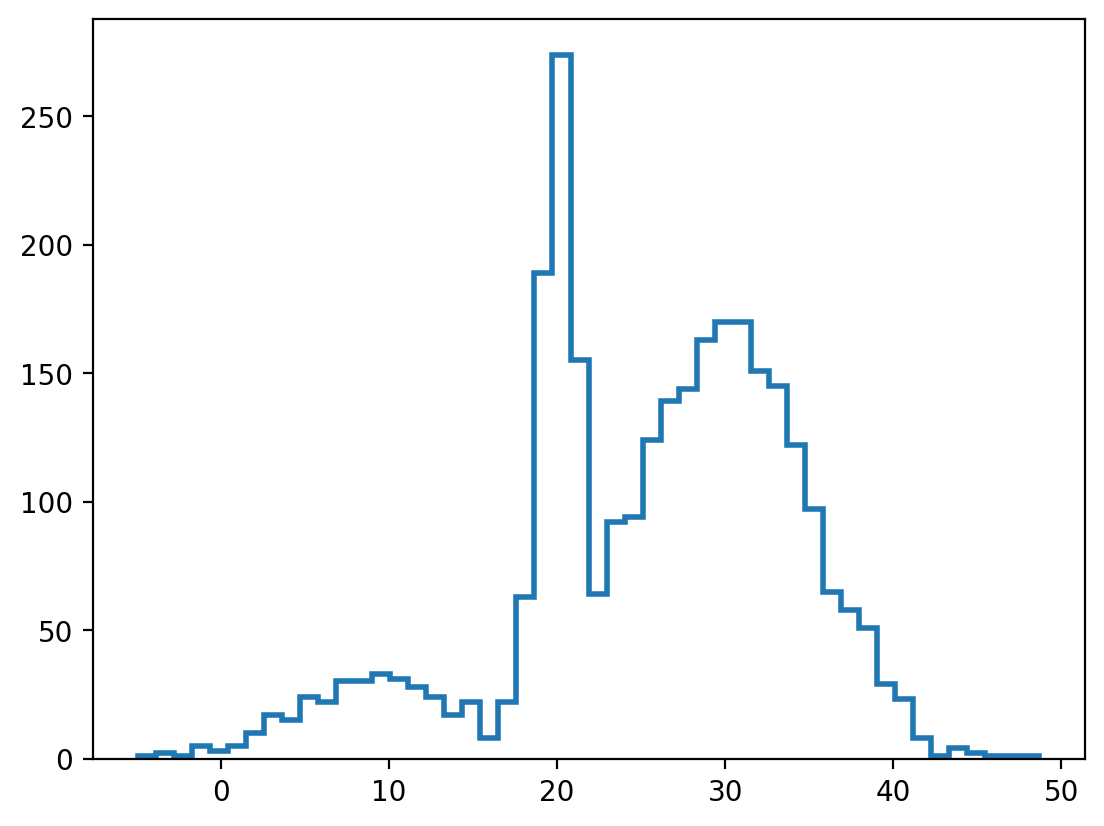

In [10]:
data=np.load("../solutions/formationchannels.npy")
plt.hist(data, bins=50, histtype='step', lw=2) #we recognize three modes

(2950, 1)
[ 1  2  3  4  5  6  7  8  9 10]


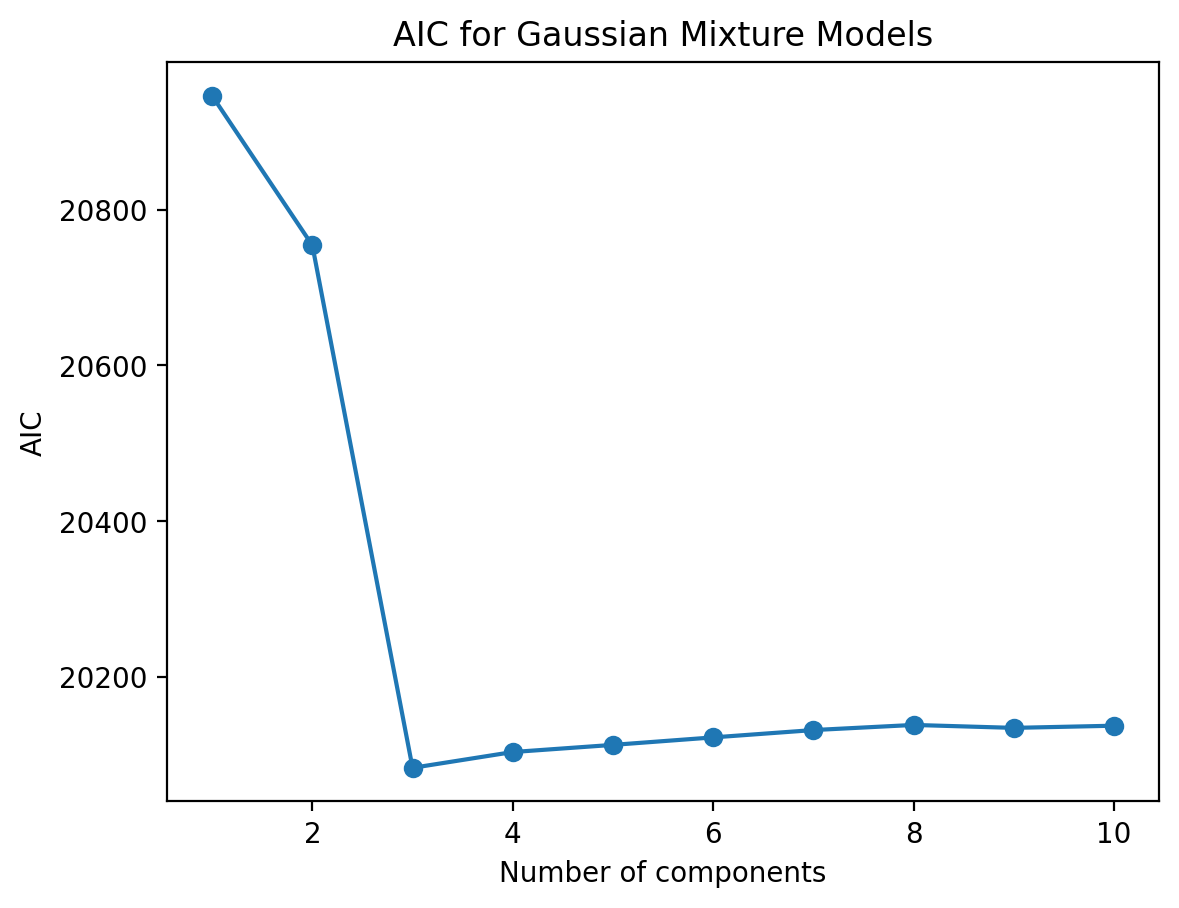

In [37]:
N=10 #number of fit components
AIC=[]
xgrid = np.linspace(-0.5, 1.5, 1000)
print(data.shape)

for n in range(1,N+1):
    gmm=GaussianMixture(n_components=int(n))
    gmm.fit(data)
    AIC.append(gmm.aic(data))
N_grid = np.arange(1, N+1)
print(N_grid)

plt.plot(N_grid, AIC, 'o-')
plt.xlabel('Number of components')
plt.ylabel('AIC')
plt.title('AIC for Gaussian Mixture Models')
plt.show()


The number of modes that best represents the data is 3.

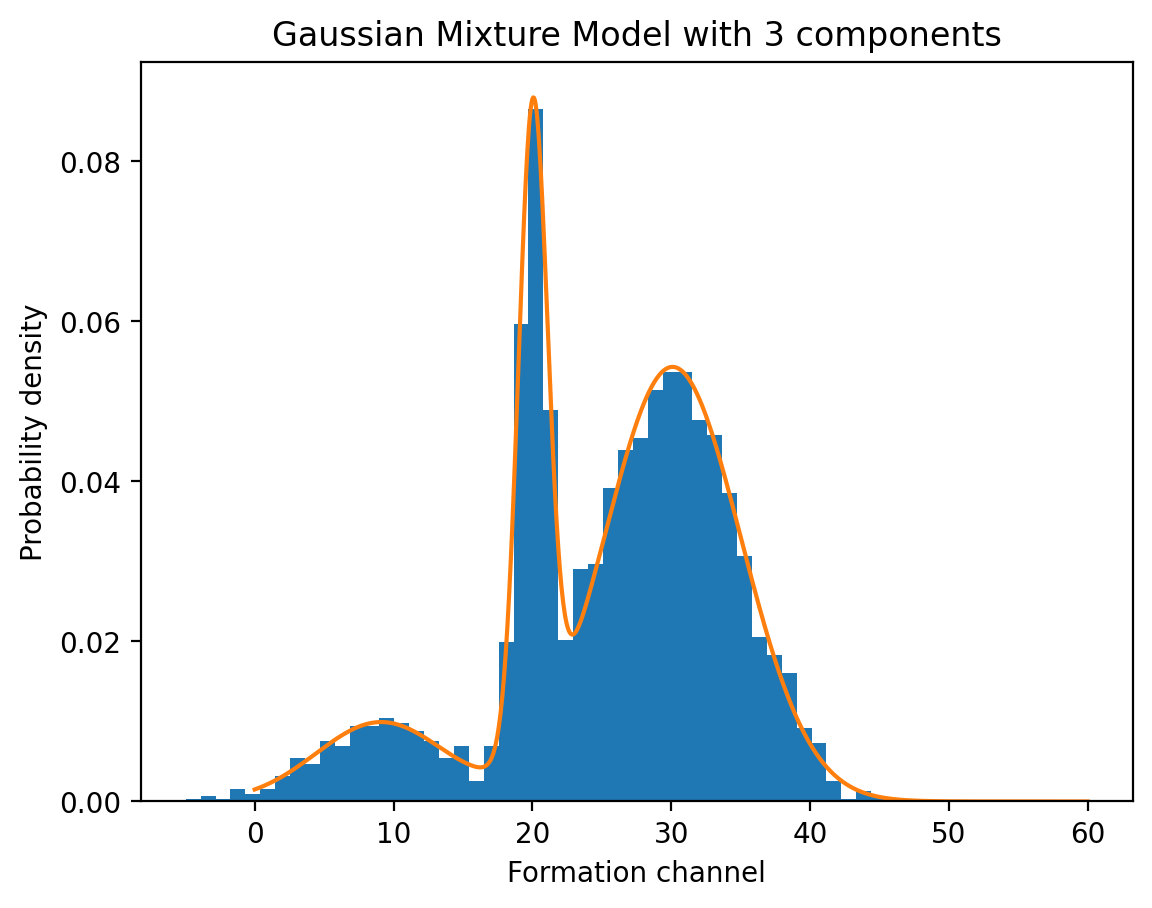

In [57]:
gmm=GaussianMixture(n_components=3)
gmm.fit(data)
pdf=gmm.score_samples(xgrid.reshape(-1, 1))
plt.hist(data, bins=50, density=True)
xgrid = np.linspace(0, 60, 1000)
plt.plot(xgrid, np.exp(pdf))
plt.xlabel('Formation channel')
plt.ylabel('Probability density')
plt.title('Gaussian Mixture Model with 3 components')
plt.show()
# Plot the means and covariances of the components

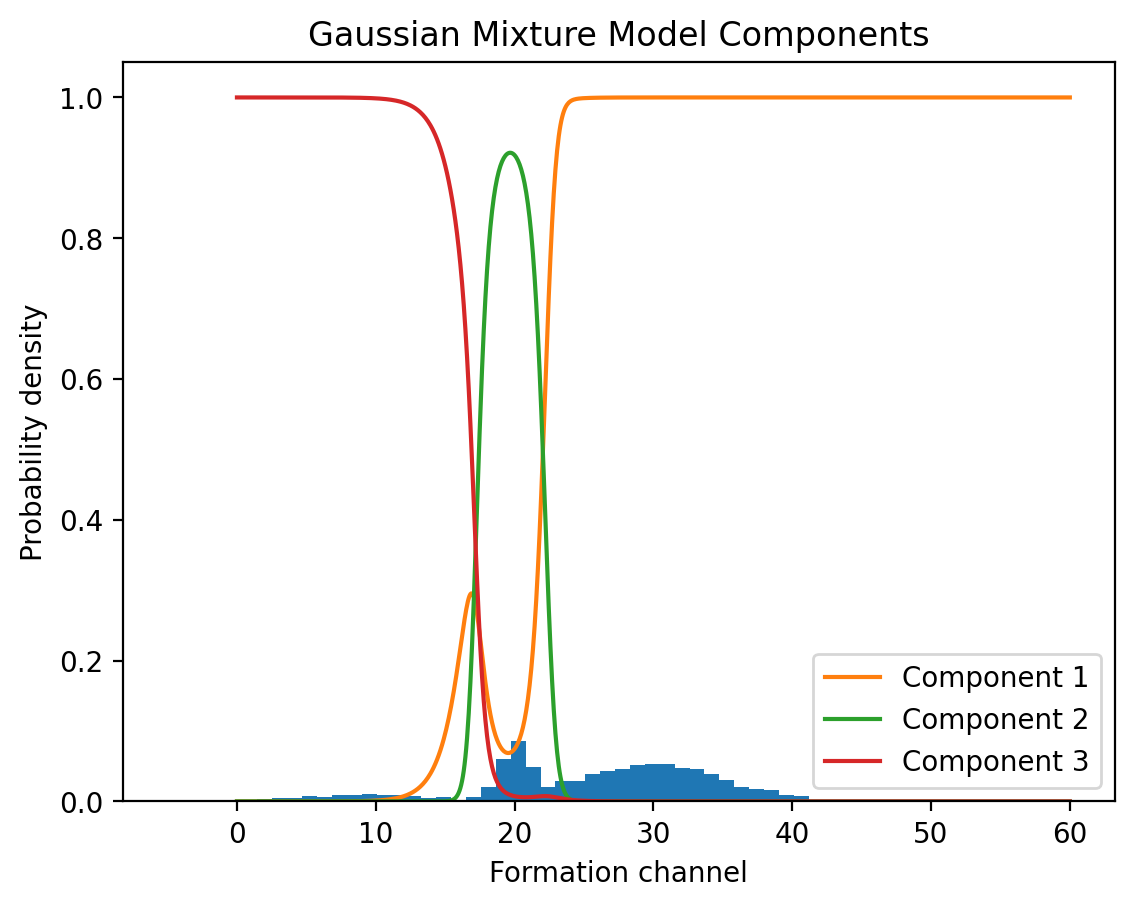

In [ ]:
xgrid= np.linspace(0, 60, 1000)
gmm=GaussianMixture(n_components=3)
gmm.fit(data)

density=gmm.predict_proba(xgrid.reshape(-1, 1)) #get the probability density for each component
plt.hist(data, bins=50, density=True)
for i in range(gmm.n_components):
    plt.plot(xgrid, density[:, i], label=f'Component {i+1}')
plt.xlabel('Formation channel')
plt.ylabel('Probability density')
plt.title('Gaussian Mixture Model Components')
plt.legend()
plt.show()
